In [1]:
from qiskit.circuit.library.standard_gates import XGate
from qiskit import QuantumCircuit, QuantumRegister

In [2]:
tr_tab={0: 1, 1: 2, 2: 4, 3: 1, 4: 2, 5: 4, 6: 1, 7: 2}
n = 3

tr_tab={0: 1, 1: 2, 2: 4, 3: 8, 4: 1, 5: 2, 6: 4, 7: 8, 8: 1, 9: 2, 10: 4, 11: 8, 12: 1, 13: 2, 14: 4, 15: 8}
n = 4
num_cnot = 16

In [3]:
def dec2bin(decimal,n):
    binary = bin(decimal)[2:]  
    binary = binary.zfill(n)   
    return binary

In [4]:
def bin2dec(bin_list):
    res = 0
    power = len(bin_list) - 1  # 가장 왼쪽 비트의 위치부터 시작
    for bit in bin_list:
        res += bit*2 ** power
        power -= 1
    return res

In [5]:
keys = list(map(lambda x: dec2bin(x, n), list(tr_tab.values())))       
val = list(map(lambda x: dec2bin(x, n), list(tr_tab.keys())))

In [6]:
#1이 되는 위치 구하기
res = []
num_anc = 0
for j in range(n-1,-1,-1):
    pos = []
    for i,key in enumerate(keys):
        if(key[j] == '1'):
            pos.append(i)
            num_anc += 1
    res.append(pos)

In [7]:
#binary의 모든 경우를 표현하기 위한 x gate 배치 순서
ord_xgate=[0]
for i in range(n-1):
    side = [x + 1 for x in ord_xgate]
    ord_xgate.append(0)
    ord_xgate = side + [0] + side

In [8]:
#어느 위치에 CnX gate를 추가해야할 지 확인
one_dim_res = [element for row in res for element in row]
CnX_gate_pos = []
measure = []

cur_bin = [0]*n
for j,i in enumerate(ord_xgate):
    cur_dec = bin2dec(cur_bin) 
    measure.append(cur_dec)
    for v in one_dim_res:
        if(cur_dec == v):
            CnX_gate_pos.append(j)
    
    if(cur_bin[i] == 0):
        cur_bin[i] = 1
    else:
        cur_bin[i] = 0
        
cur_dec = bin2dec(cur_bin) 
measure.append(cur_dec)
for v in one_dim_res:
    if(cur_dec == v):
        CnX_gate_pos.append(2**n-1)

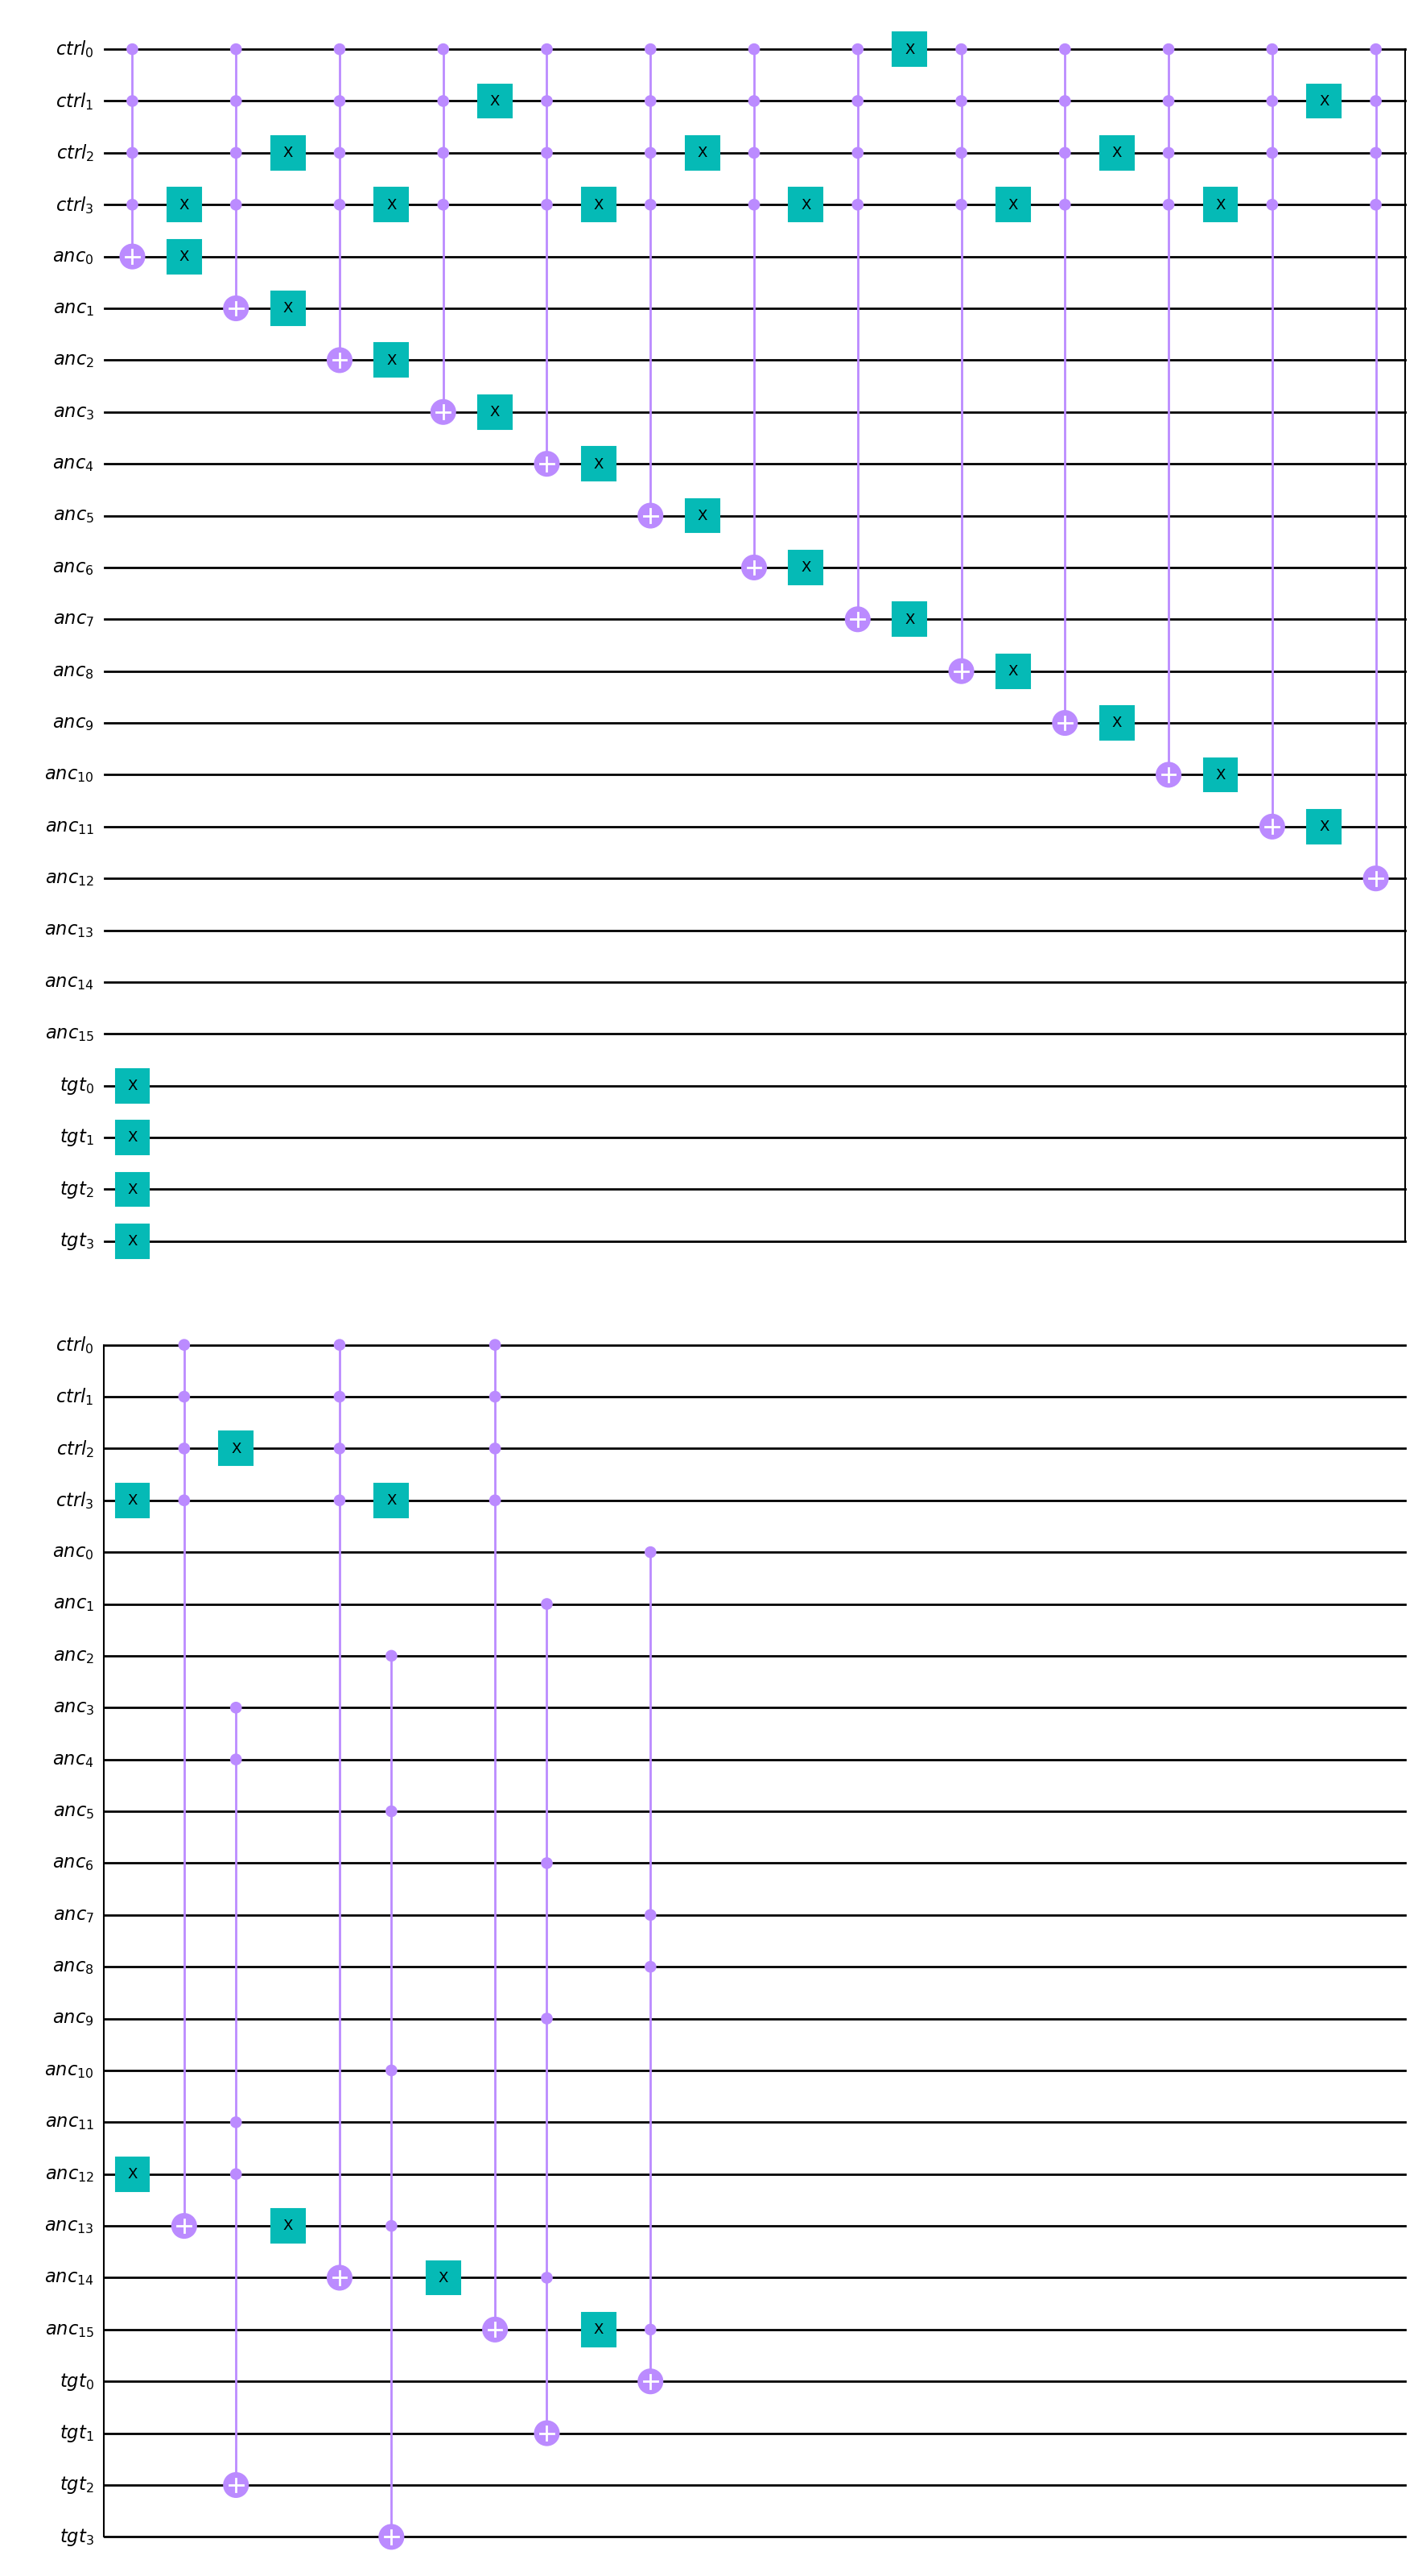

In [12]:
cnt = 0#num of gate

ctrl = QuantumRegister(n, 'ctrl')
tgt = QuantumRegister(n, 'tgt')
anc = QuantumRegister(num_anc, 'anc')
circuit = QuantumCircuit(ctrl, anc, tgt)
c4x_gate = XGate().control(n)

k = 0
# 모든 case
for i, l in enumerate(ord_xgate):
    if i in CnX_gate_pos:
        circuit.append(c4x_gate, ctrl[:] + anc[k:k+1])
        k += 1
        cnt += n**2
    circuit.x(l)
    cnt += 1
    
if len(ord_xgate) in CnX_gate_pos:
    circuit.append(c4x_gate, ctrl[:] + anc[k:k+1])
    cnt += n**2

#anc간 계산
measure #[0, 1, 3, 2, 6, 7, 5, 4]
res # [[0, 3, 6], [1, 4, 7], [2, 5]]
anc_set = []
for a in res:
    s = []
    for i in a:
        s.append(measure.index(2**n-1-i))
    anc_set.append(s)
k = n-1
for a in anc_set:
    cx_gate = XGate().control(len(a))
    r = []
    for i in a:
        r = r + anc[i:i+1]
        circuit.x(i+n)
        cnt += 1
    circuit.x(n+len(anc)+k)
    cnt += 1
    circuit.append(cx_gate, r + tgt[k:k+1])
    cnt += 1 if len(a) < 3 else len(a)**2
    k-=1

circuit.draw('mpl')

In [13]:
print(cnt)

355
